**Upload Dataset**

In [2]:
from google.colab import files 
uploadedFile = files.upload()

Saving house_dataset.csv to house_dataset.csv


**Import Lib:**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob

**Read Data**

In [4]:
frame = pd.read_csv('/content/house_dataset.csv')
frame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Check Null**

In [6]:
frame.isnull().values.any()

False

<bound method DataFrame.count of                id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]>

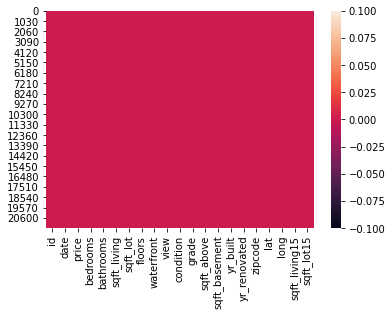

In [7]:
sns.heatmap(frame.isnull())
frame.count

**Define Features**

In [8]:
# independent feature
X = frame.drop(['price', 'date', 'id'], axis=1)
print(X)
print()
# dependent feature
Y = frame.price 
print(Y)

       bedrooms  bathrooms  sqft_living  ...     long  sqft_living15  sqft_lot15
0             3       1.00         1180  ... -122.257           1340        5650
1             3       2.25         2570  ... -122.319           1690        7639
2             2       1.00          770  ... -122.233           2720        8062
3             4       3.00         1960  ... -122.393           1360        5000
4             3       2.00         1680  ... -122.045           1800        7503
...         ...        ...          ...  ...      ...            ...         ...
21608         3       2.50         1530  ... -122.346           1530        1509
21609         4       2.50         2310  ... -122.362           1830        7200
21610         2       0.75         1020  ... -122.299           1020        2007
21611         3       2.50         1600  ... -122.069           1410        1287
21612         2       0.75         1020  ... -122.299           1020        1357

[21613 rows x 18 columns]



**Pair plot**

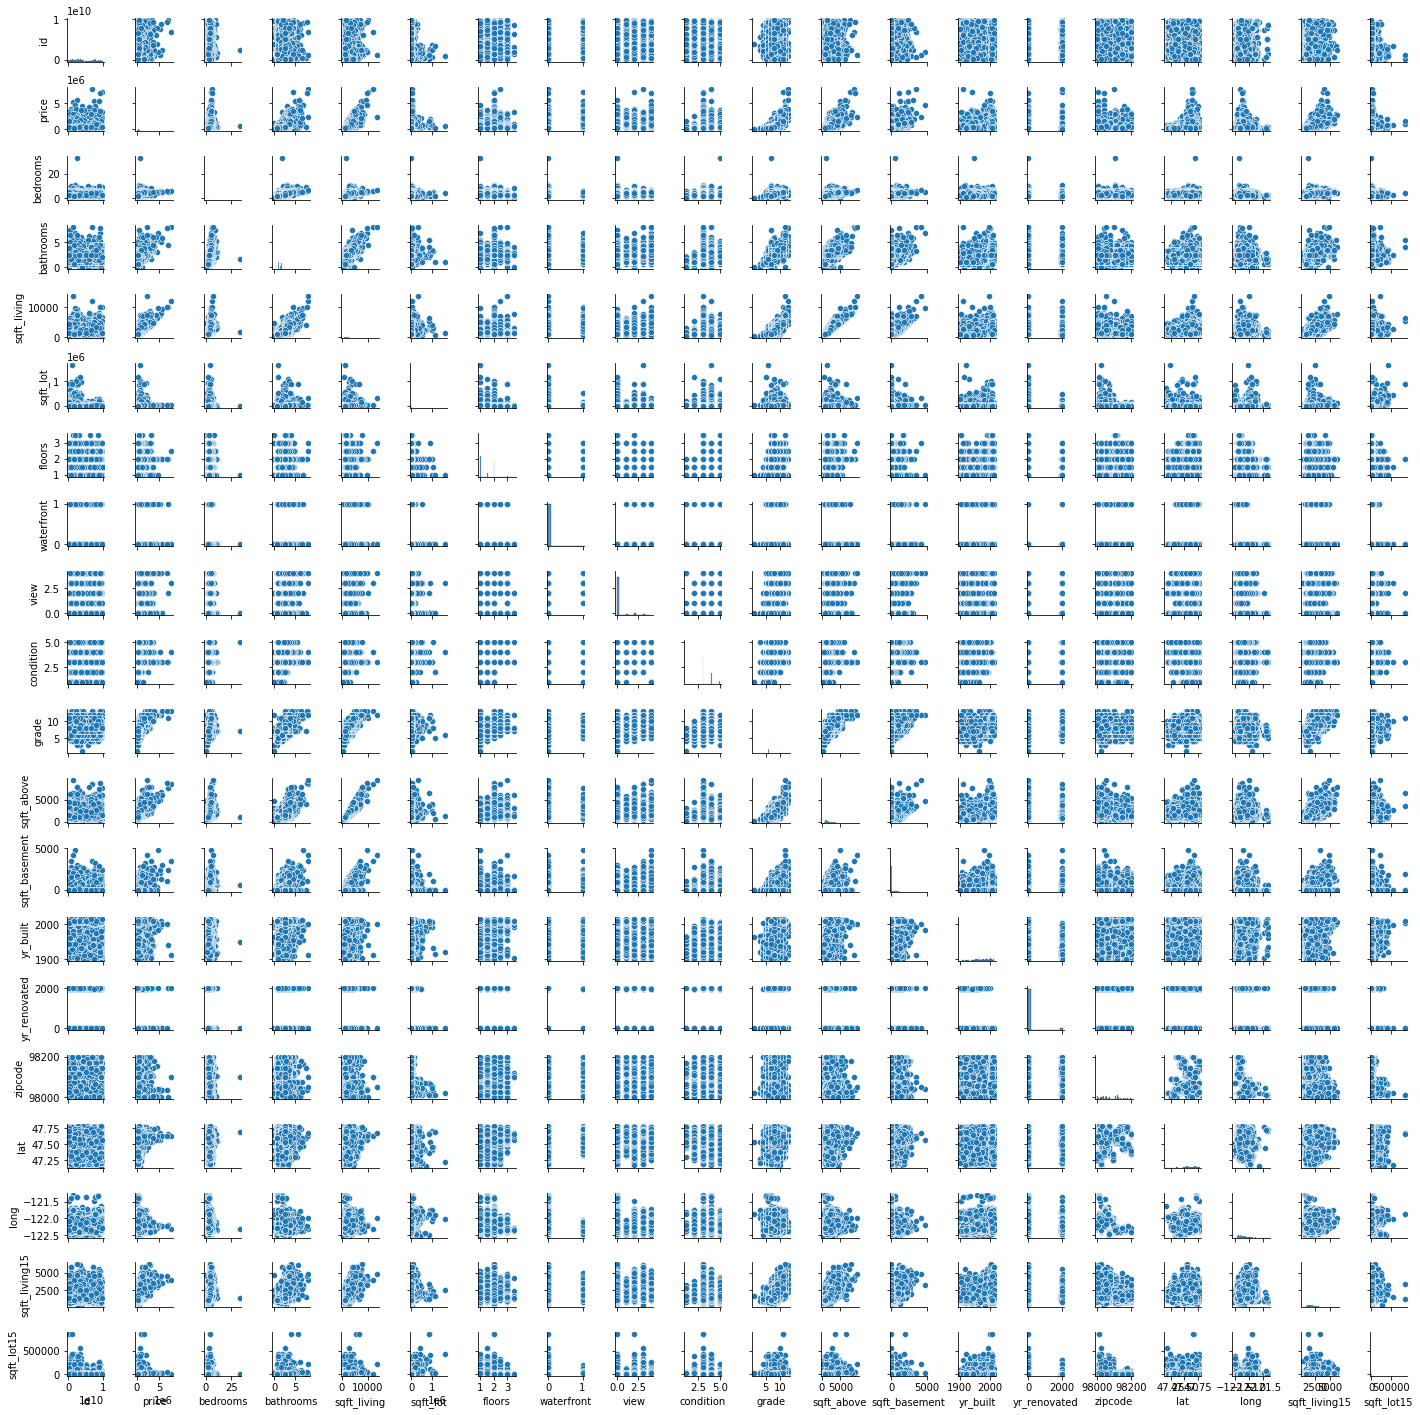

In [9]:
sns.pairplot(frame, height = 1)

**Generate Correlation matrix**

In [10]:
corr_mat = frame.corr()
corr_mat

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

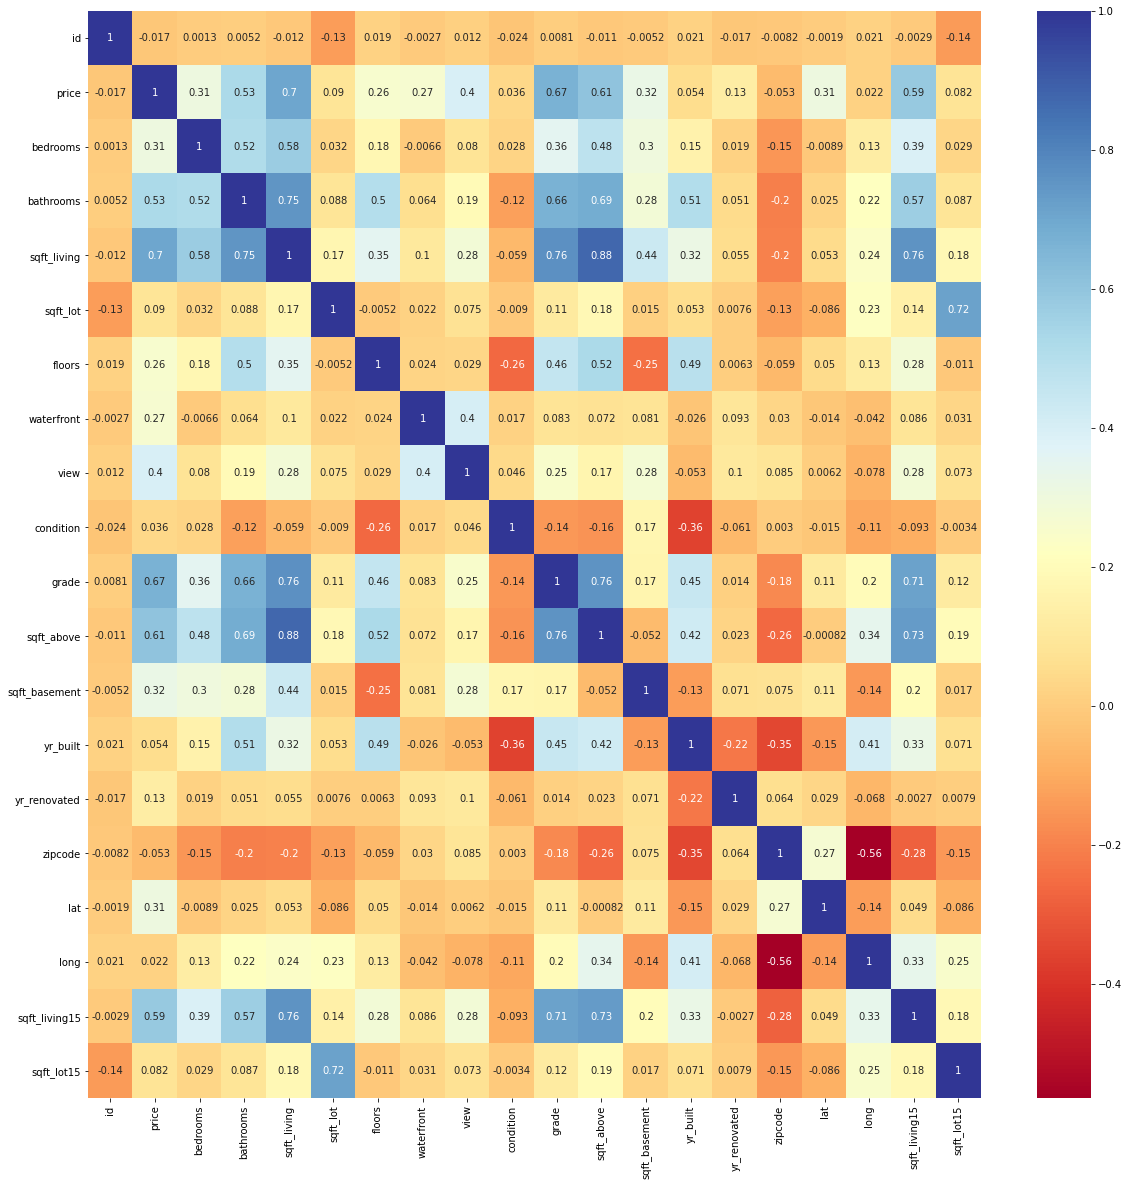

In [11]:
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))
sns.heatmap(frame[top_corr_features].corr(),annot=True,cmap="RdYlBu")
corr_mat.index

**Improve predictibility and Feature Importance**

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

[0.00764014 0.03410786 0.17733696 0.01243174 0.00747407 0.04150281
 0.03383126 0.01016182 0.2466564  0.06388303 0.01271627 0.03398475
 0.00640221 0.02004378 0.13792276 0.05079049 0.09150799 0.01160565]


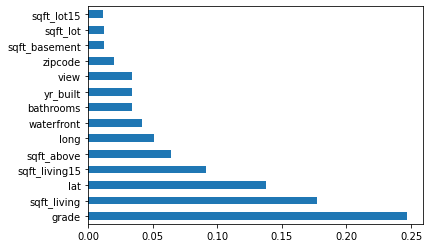

In [13]:
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(14).plot(kind='barh')
plt.show()

In [14]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Split Data**

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

**ANN**

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [17]:
nuralNetworkModel = Sequential()

Input Layer

In [18]:
nuralNetworkModel.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

Internal Layer

In [19]:
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
nuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))

Output Layer

In [20]:
nuralNetworkModel.add(Dense(1, kernel_initializer='normal',activation='linear'))

Set for Compiling

In [21]:
nuralNetworkModel.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
nuralNetworkModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2432      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2

Fitting Train

In [22]:
nuralNetworkModel.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
1014/1014 [==============================] - 6s 6ms/step - loss: 245805.0884 - mean_absolute_error: 245805.0884 - val_loss: 189981.2031 - val_mean_absolute_error: 189981.2031
Epoch 2/100
1014/1014 [==============================] - 5s 5ms/step - loss: 169446.8444 - mean_absolute_error: 169446.8444 - val_loss: 170387.2188 - val_mean_absolute_error: 170387.2188
Epoch 3/100
1014/1014 [==============================] - 5s 5ms/step - loss: 164709.9507 - mean_absolute_error: 164709.9507 - val_loss: 174596.4688 - val_mean_absolute_error: 174596.4688
Epoch 4/100
1014/1014 [==============================] - 5s 5ms/step - loss: 161202.4299 - mean_absolute_error: 161202.4299 - val_loss: 155528.7812 - val_mean_absolute_error: 155528.7812
Epoch 5/100
1014/1014 [==============================] - 5s 5ms/step - loss: 161735.8163 - mean_absolute_error: 161735.8163 - val_loss: 149883.0000 - val_mean_absolute_error: 149882.9844
Epoch 6/100
1014/1014 [==============================] - 5s 5ms/s

Prediction

In [23]:
Y_predict = nuralNetworkModel.predict(X_test)
print(Y_predict) 

[[ 398225.2 ]
 [1304688.  ]
 [ 431579.94]
 ...
 [ 491518.75]
 [ 303257.44]
 [ 253163.3 ]]


Scatter Plot

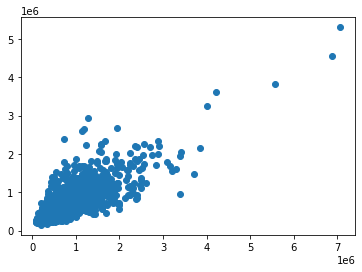

In [24]:
plt.scatter(Y_test,Y_predict)

**Histogram Plot**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


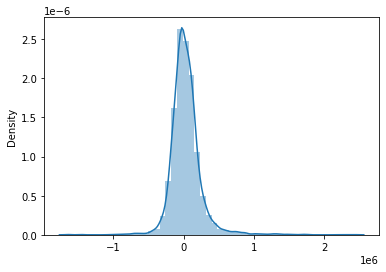

In [25]:
sns.distplot(Y_test.values.reshape(-1,1)-Y_predict)